In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set visualisation style
sns.set(style='whitegrid')


In [2]:
# Load the dataset
df = pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv')


In [3]:
# Display the first few rows
print(df.head())

# Get the basic information
print(df.info())

# Summary statistics
print(df.describe())


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
<c

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


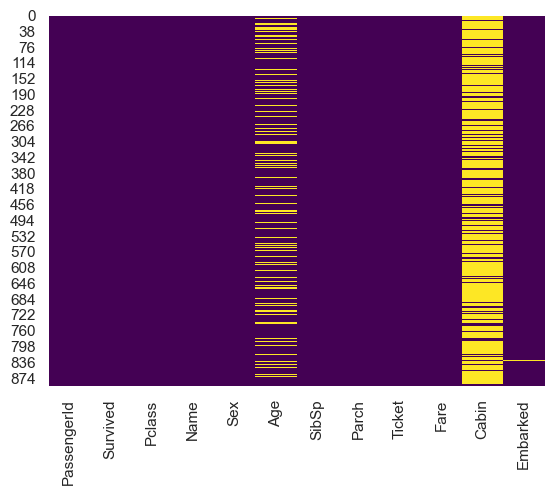

In [4]:
# Check for missing values
print(df.isnull().sum())

# Visualize missing data
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.show()

# Handling missing values
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
df.drop('Cabin', axis=1, inplace=True)


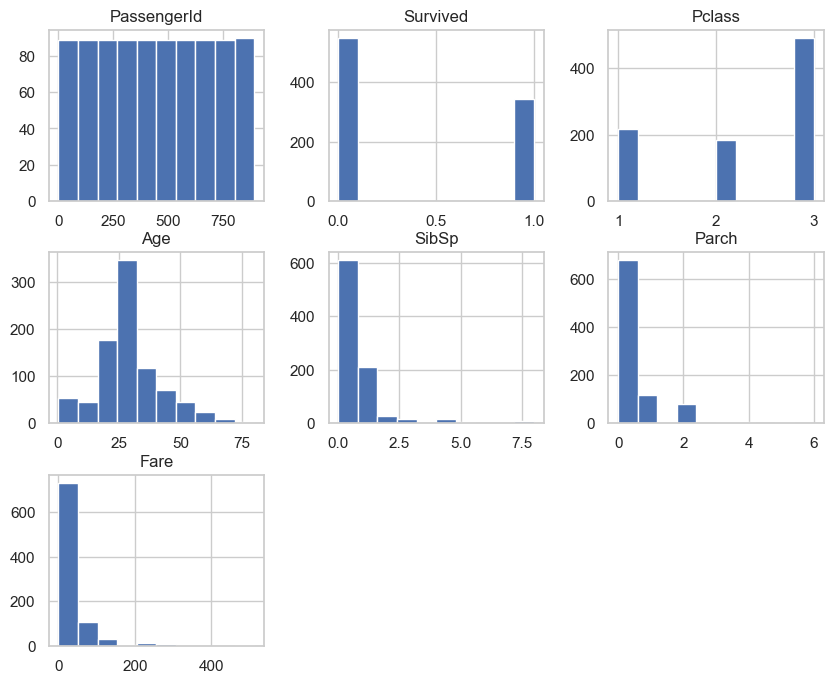

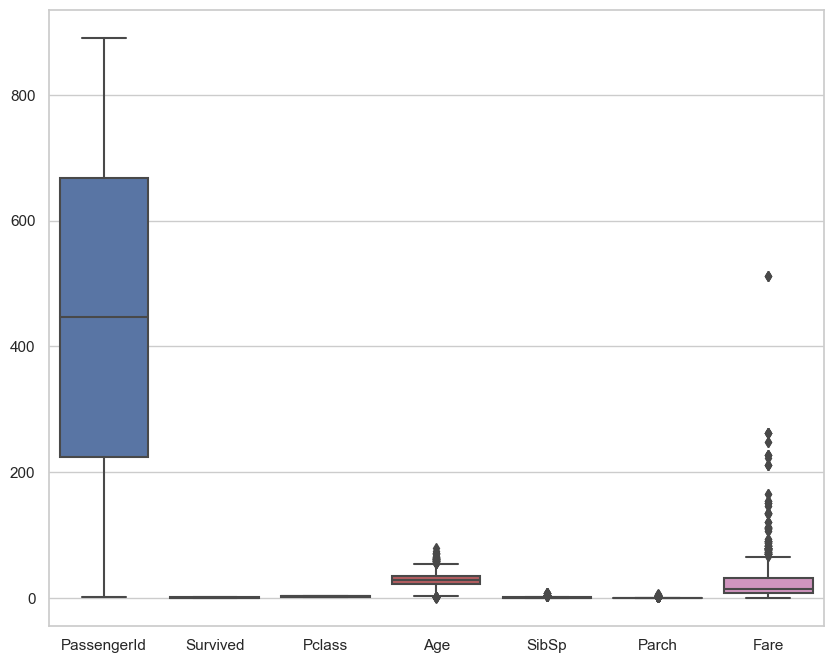

ValueError: could not convert string to float: 'Braund, Mr. Owen Harris'

<Figure size 1000x800 with 0 Axes>

In [5]:
# Histograms for numerical columns
df.hist(figsize=(10, 8))
plt.show()

# Box plots to identify outliers
plt.figure(figsize=(10, 8))
sns.boxplot(data=df)
plt.show()

# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

# Pair plot for relationships between variables
sns.pairplot(df)
plt.show()


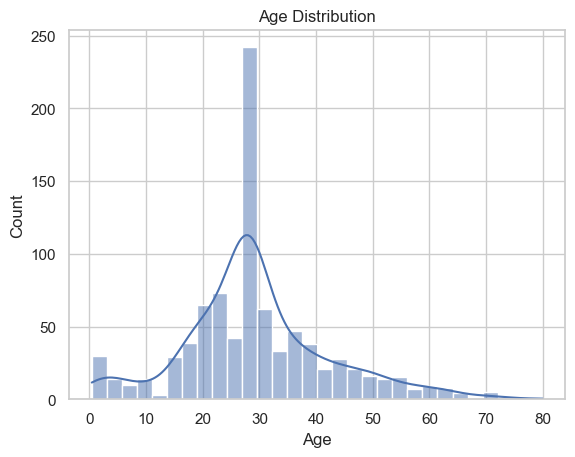

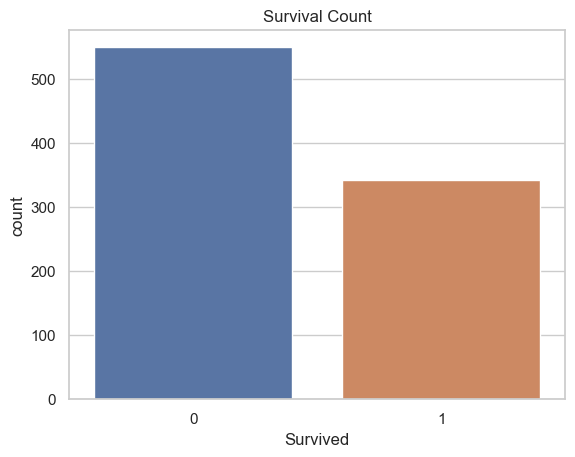

In [6]:
# Distribution of Age
sns.histplot(df['Age'], kde=True)
plt.title('Age Distribution')
plt.show()

# Count plot for Survived
sns.countplot(x='Survived', data=df)
plt.title('Survival Count')
plt.show()


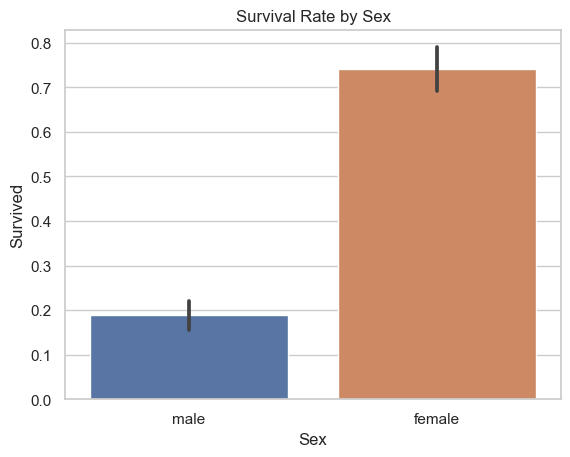

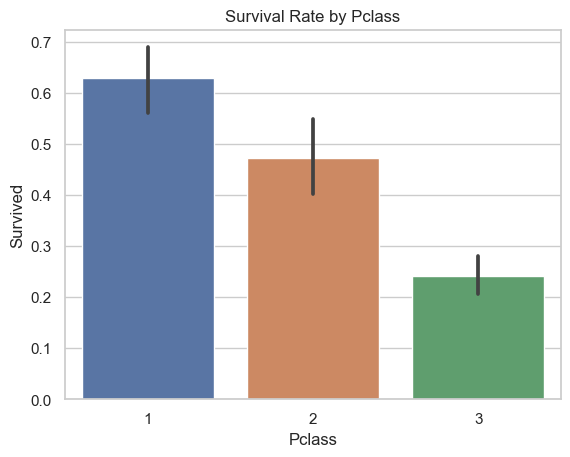

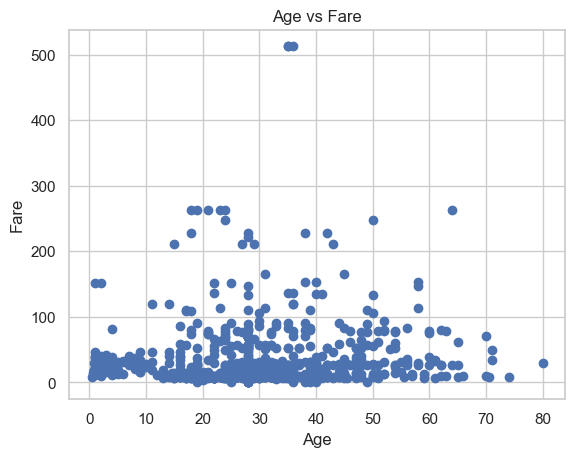

In [7]:
# Survival rate by Sex
sns.barplot(x='Sex', y='Survived', data=df)
plt.title('Survival Rate by Sex')
plt.show()

# Survival rate by Pclass
sns.barplot(x='Pclass', y='Survived', data=df)
plt.title('Survival Rate by Pclass')
plt.show()

# Scatter plot of Age vs Fare
plt.scatter(df['Age'], df['Fare'])
plt.xlabel('Age')
plt.ylabel('Fare')
plt.title('Age vs Fare')
plt.show()


In [8]:
# Heatmap for correlations
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

# Pair plot for multiple variables
sns.pairplot(df, hue='Survived')
plt.show()


ValueError: could not convert string to float: 'Braund, Mr. Owen Harris'

<Figure size 1000x800 with 0 Axes>

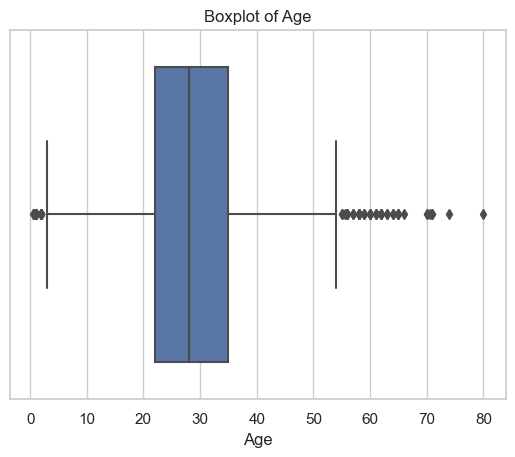

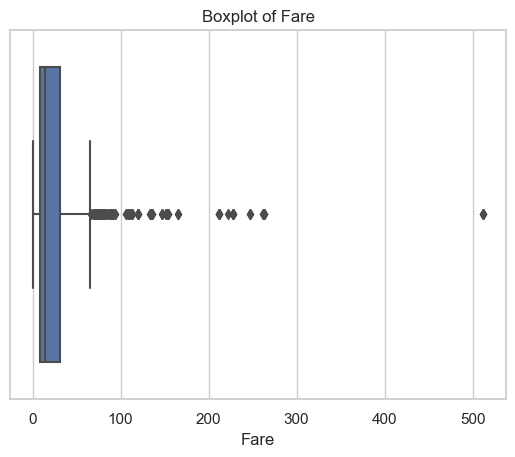

In [11]:
# Box plot to identify outliers in Age and Fare
sns.boxplot(x=df['Age'])
plt.title('Boxplot of Age')
plt.show()

sns.boxplot(x=df['Fare'])
plt.title('Boxplot of Fare')
plt.show()

# Removing outliers from Fare
Q1 = df['Fare'].quantile(0.25)
Q3 = df['Fare'].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df['Fare'] < (Q1 - 1.5 * IQR)) | (df['Fare'] > (Q3 + 1.5 * IQR)))]


In [12]:
# Create new feature: FamilySize
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

# Create new feature: IsAlone
df['IsAlone'] = 1  # Initialize to 1 (true)
df['IsAlone'].loc[df['FamilySize'] > 1] = 0  # If family size > 1, not alone/false


C:\Users\rachi\AppData\Local\Temp\ipykernel_7128\3452652433.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
C:\Users\rachi\AppData\Local\Temp\ipykernel_7128\3452652433.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['IsAlone'] = 1  # Initialize to 1 (true)
C:\Users\rachi\AppData\Local\Temp\ipykernel_7128\3452652433.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation:

Key Insights:
Survival rate by Sex:
Sex
female    0.688525
male      0.178908
Name: Survived, dtype: float64
Survival rate by Pclass:
Pclass
1    0.508929
2    0.486034
3    0.245868
Name: Survived, dtype: float64


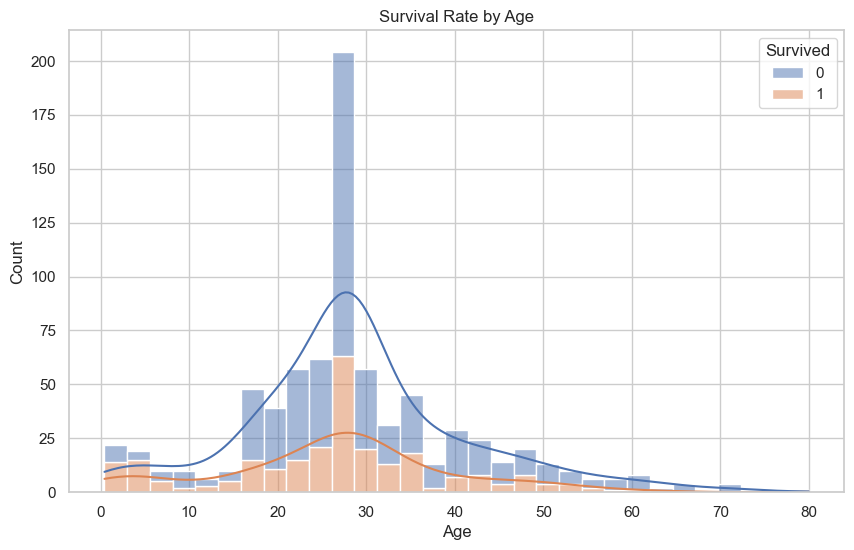

Survival rate by Family Size:
FamilySize
1    0.270378
2    0.487603
3    0.575000
4    0.727273
5    0.076923
6    0.055556
7    0.333333
8    0.000000
Name: Survived, dtype: float64
Survival rate by IsAlone:
IsAlone
0    0.466912
1    0.270378
Name: Survived, dtype: float64


In [13]:
# Summarize key findings
print("Key Insights:")

# Survival rates by Sex
survival_sex = df.groupby('Sex')['Survived'].mean()
print(f"Survival rate by Sex:\n{survival_sex}")

# Survival rates by Pclass
survival_pclass = df.groupby('Pclass')['Survived'].mean()
print(f"Survival rate by Pclass:\n{survival_pclass}")

# Survival rates by Age
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Age', hue='Survived', kde=True, multiple='stack')
plt.title('Survival Rate by Age')
plt.show()

# Survival rates by FamilySize
survival_familysize = df.groupby('FamilySize')['Survived'].mean()
print(f"Survival rate by Family Size:\n{survival_familysize}")

# Survival rates by IsAlone
survival_isalone = df.groupby('IsAlone')['Survived'].mean()
print(f"Survival rate by IsAlone:\n{survival_isalone}")


Findings:
1. Survival Rate by Sex: Females had a significantly higher survival rate compared to males.
2. Survival Rate by Pclass: Passengers in 1st class had a much higher survival rate than those in 2nd and 3rd classes.
3. Survival Rate by Age: Younger passengers had higher survival rates.
4. Survival Rate by Family Size: Passengers with smaller family sizes had higher survival rates. Large families and those traveling alone had lower survival rates.
5. Survival Rate by IsAlone: Passengers who were alone had lower survival rates compared to those who were with family.